In [2]:
import pandas as pd
import numpy as np

In [3]:
car_data= pd.read_excel('DS1_C4_S5_Car_Data_Challenge.xlsx')

In [4]:
car_data.head()

,S. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Engine_Location,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\ASUS\AppData\Local\Temp\ipykernel_5780\3152929519.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mileage_data['City_Mileage_km_litre'] = pd.to_numeric(mileage_data['City_Mileage_km_litre'], errors='coerce')


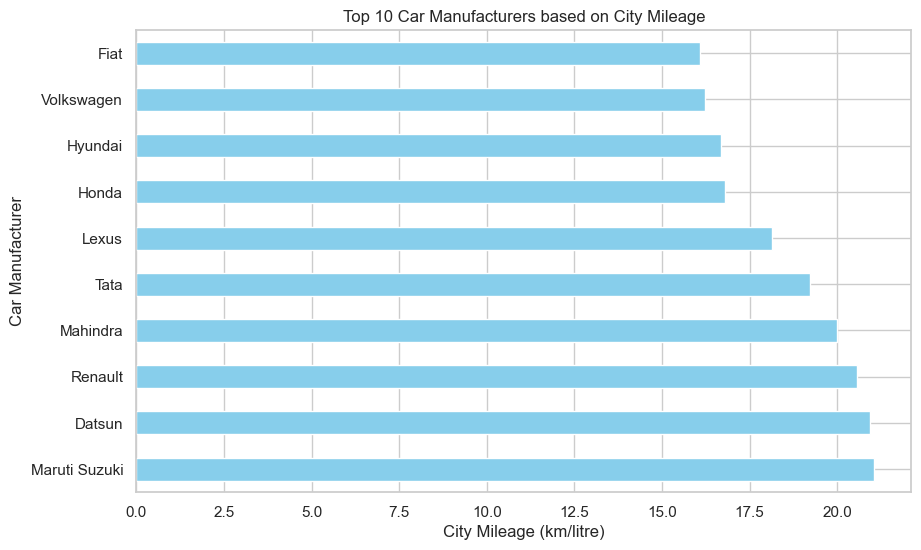

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Extracting relevant columns
mileage_data = car_data[['Make', 'City_Mileage_km_litre']]

# Converting 'City_Mileage_km_litre' to numeric, handling errors
mileage_data['City_Mileage_km_litre'] = pd.to_numeric(mileage_data['City_Mileage_km_litre'], errors='coerce')

# Grouping by 'Make' and calculating the mean city mileage for each manufacturer
top_manufacturers = mileage_data.groupby('Make')['City_Mileage_km_litre'].mean().sort_values(ascending=False).head(10)

# Plotting the horizontal bar graph
plt.figure(figsize=(10, 6))
top_manufacturers.plot(kind='barh', color='skyblue')
plt.xlabel('City Mileage (km/litre)')
plt.ylabel('Car Manufacturer')
plt.title('Top 10 Car Manufacturers based on City Mileage')
plt.show()

###### task 2

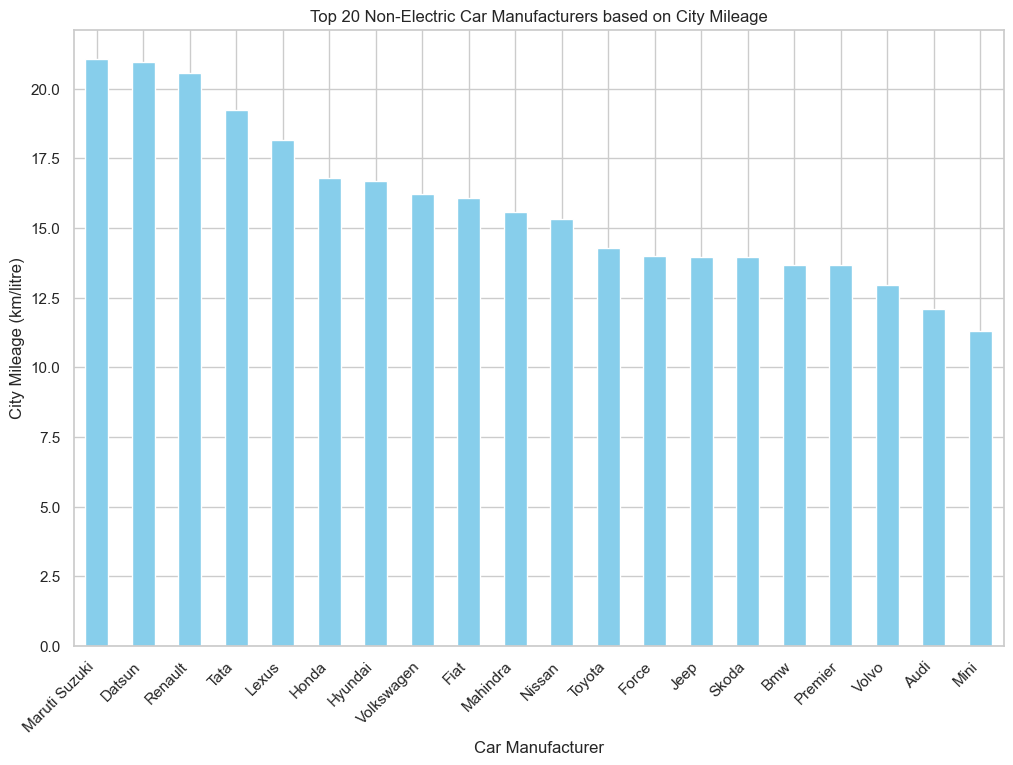

In [6]:
# Extracting relevant columns
non_electric_data = car_data[car_data['Fuel_Type'] != 'Electric'][['Make', 'City_Mileage_km_litre']]

# Converting 'City_Mileage_km_litre' to numeric, handling errors
non_electric_data['City_Mileage_km_litre'] = pd.to_numeric(non_electric_data['City_Mileage_km_litre'], errors='coerce')

# Grouping by 'Make' and calculating the mean city mileage for each manufacturer
top_non_electric_manufacturers = non_electric_data.groupby('Make')['City_Mileage_km_litre'].mean().sort_values(ascending=False).head(20)

# Plotting the bar graph
plt.figure(figsize=(12, 8))
top_non_electric_manufacturers.plot(kind='bar', color='skyblue')
plt.xlabel('Car Manufacturer')
plt.ylabel('City Mileage (km/litre)')
plt.title('Top 20 Non-Electric Car Manufacturers based on City Mileage')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability
plt.show()

###### task 3

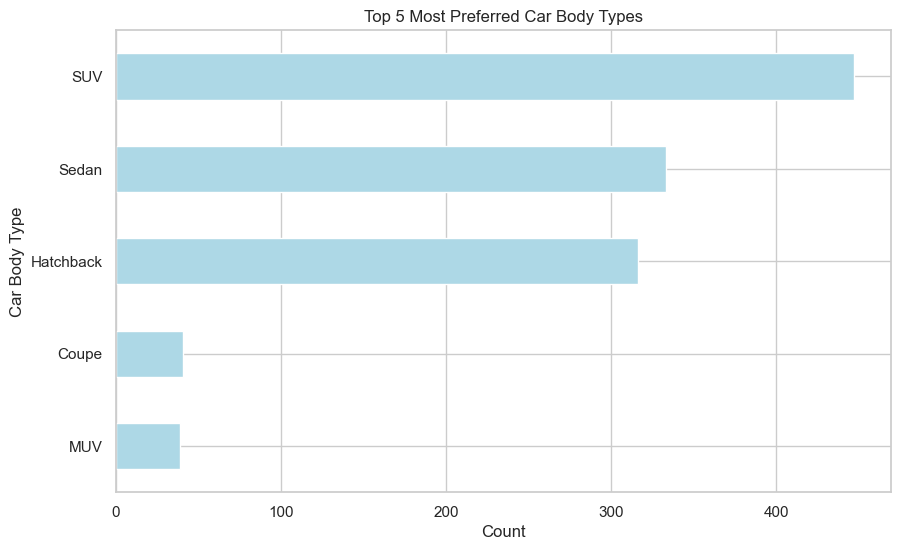

In [7]:
# Extracting relevant columns
body_type_counts = car_data['Body_Type'].value_counts().head(5)

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 6))
body_type_counts.sort_values().plot(kind='barh', color='lightblue')
plt.xlabel('Count')
plt.ylabel('Car Body Type')
plt.title('Top 5 Most Preferred Car Body Types')
plt.show()

###### task 4

In [8]:
# Filtering data for the specified manufacturers
selected_companies = ['Hundai', 'Mahindra', 'Renault', 'Skoda']
filtered_df = car_data[car_data['Make'].isin(selected_companies)]

# Creating pivot tables
pivot_mean_city_mileage = pd.pivot_table(filtered_df, values='City_Mileage_km_litre', index='Make', aggfunc='mean')
pivot_median_city_mileage = pd.pivot_table(filtered_df, values='City_Mileage_km_litre', index='Make', aggfunc='median')
pivot_mean_highway_mileage = pd.pivot_table(filtered_df, values='Highway_Mileage_km_litre', index='Make', aggfunc='mean')
pivot_median_highway_mileage = pd.pivot_table(filtered_df, values='Highway_Mileage_km_litre', index='Make', aggfunc='median')

# Displaying the pivot tables
print("Mean City Mileage:")
print(pivot_mean_city_mileage)

print("\nMedian City Mileage:")
print(pivot_median_city_mileage)

print("\nMean Highway Mileage:")
print(pivot_mean_highway_mileage)

print("\nMedian Highway Mileage:")
print(pivot_median_highway_mileage)

Mean City Mileage:
          City_Mileage_km_litre
Make                           
Mahindra              20.003763
Renault               20.554286
Skoda                 13.953333

Median City Mileage:
          City_Mileage_km_litre
Make                           
Mahindra                  16.00
Renault                   21.04
Skoda                     14.50

Mean Highway Mileage:
          Highway_Mileage_km_litre
Make                              
Mahindra                 18.140175
Renault                  17.690000
Skoda                    17.268529

Median Highway Mileage:
          Highway_Mileage_km_litre
Make                              
Mahindra                     17.21
Renault                      19.60
Skoda                        16.00


###### task 5

          Mean_City_Mileage  Median_City_Mileage
Make                                            
Hundai                  NaN                  NaN
Renault           20.554286                21.04
Mahindra          20.003763                16.00
Skoda             13.953333                14.50


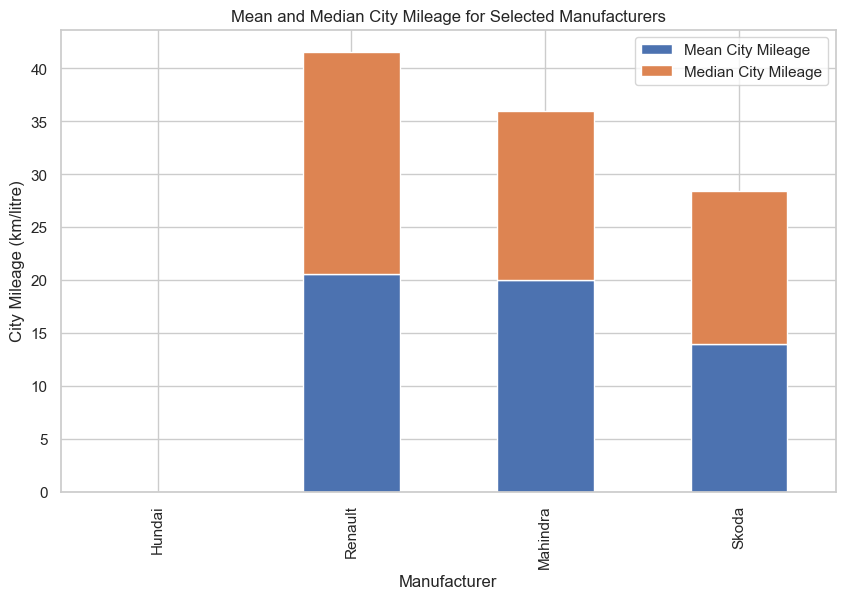

In [9]:
# Filtering data for the specified manufacturers
selected_companies = ['Hundai', 'Renault', 'Mahindra', 'Skoda']
filtered_df = car_data[car_data['Make'].isin(selected_companies)]

# Creating a DataFrame with mean and median city mileage for each manufacturer
mean_city_mileage = filtered_df.groupby('Make')['City_Mileage_km_litre'].mean()
median_city_mileage = filtered_df.groupby('Make')['City_Mileage_km_litre'].median()

# Combining mean and median arrays into a single DataFrame
summary_df = pd.DataFrame({
    'Make': selected_companies
})
# Renaming columns to avoid overlap
summary_df = summary_df.set_index('Make').join(mean_city_mileage.rename('Mean_City_Mileage')).join(median_city_mileage.rename('Median_City_Mileage'))

# Displaying the data
print(summary_df)

# Plotting a stacked column chart
summary_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Mean and Median City Mileage for Selected Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('City Mileage (km/litre)')
plt.legend(["Mean City Mileage", "Median City Mileage"])
plt.show()

###### task 6

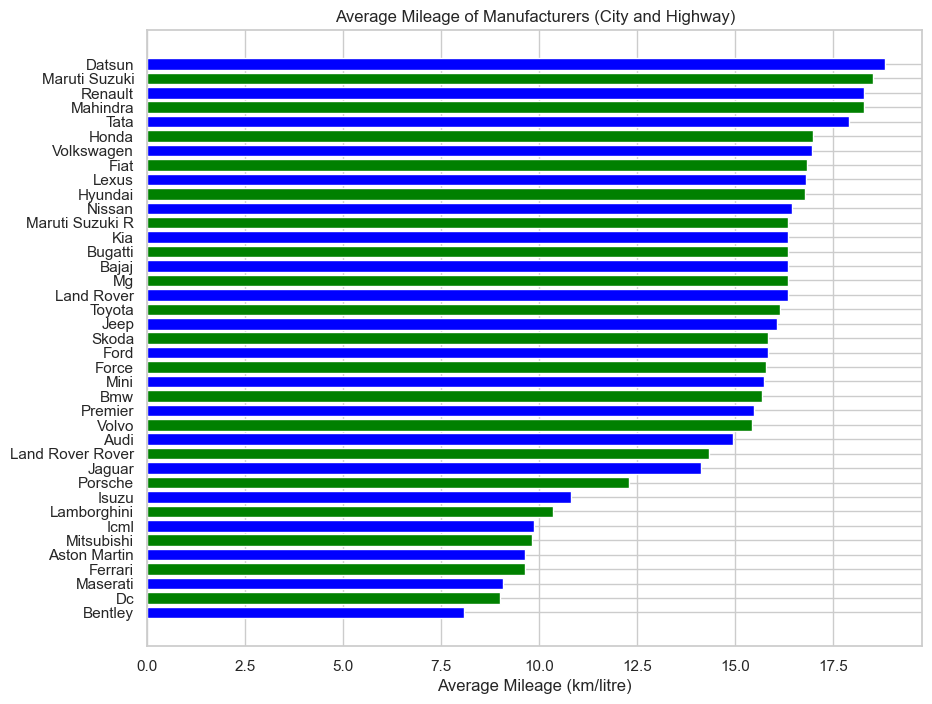

In [10]:
# Filling missing values in the mileage columns with the mean values
car_data['City_Mileage_km_litre'].fillna(car_data['City_Mileage_km_litre'].mean(), inplace=True)
car_data['Highway_Mileage_km_litre'].fillna(car_data['Highway_Mileage_km_litre'].mean(), inplace=True)

# Creating a DataFrame with average city and highway mileage for each manufacturer
average_mileage = car_data.groupby('Make').agg({
    'City_Mileage_km_litre': 'mean',
    'Highway_Mileage_km_litre': 'mean'
}).reset_index()

# Calculating overall average mileage
average_mileage['Average_Mileage'] = (average_mileage['City_Mileage_km_litre'] + average_mileage['Highway_Mileage_km_litre']) / 2

# Sorting the DataFrame in ascending order of average mileage
average_mileage = average_mileage.sort_values(by='Average_Mileage')

# Plotting a horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(average_mileage['Make'], average_mileage['Average_Mileage'], color=['blue', 'green'])
plt.xlabel('Average Mileage (km/litre)')
plt.title('Average Mileage of Manufacturers (City and Highway)')
plt.show()

###### task 7

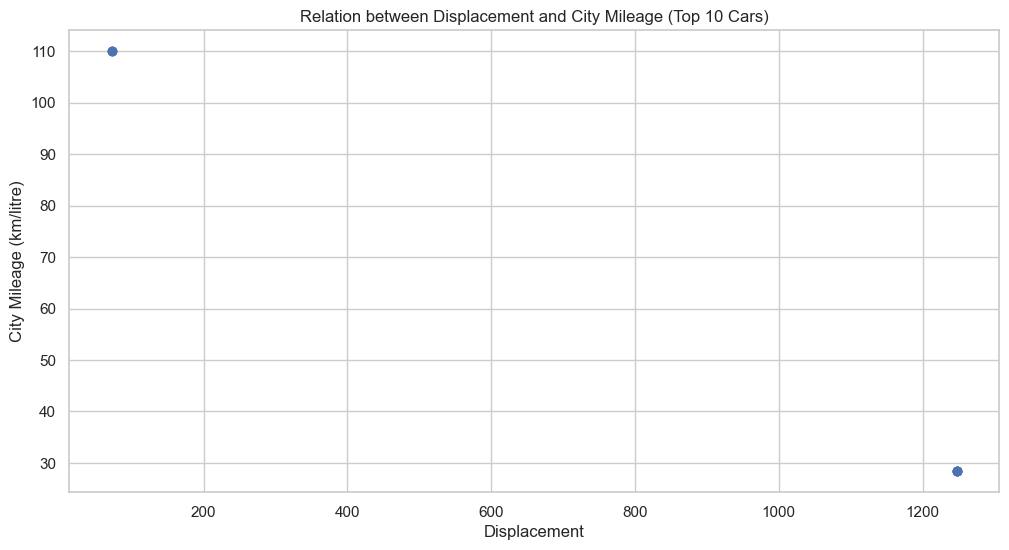

In [11]:
# Sorting the DataFrame by city mileage in descending order and selecting the top 10 cars
top_10_city_mileage = car_data.sort_values(by='City_Mileage_km_litre', ascending=False).head(10)

# Plotting a line chart
plt.figure(figsize=(12, 6))
plt.plot(top_10_city_mileage['Displacement'], top_10_city_mileage['City_Mileage_km_litre'], marker='o', linestyle='-', color='b')
plt.xlabel('Displacement')
plt.ylabel('City Mileage (km/litre)')
plt.title('Relation between Displacement and City Mileage (Top 10 Cars)')
plt.grid(True)
plt.show()

###### task 8

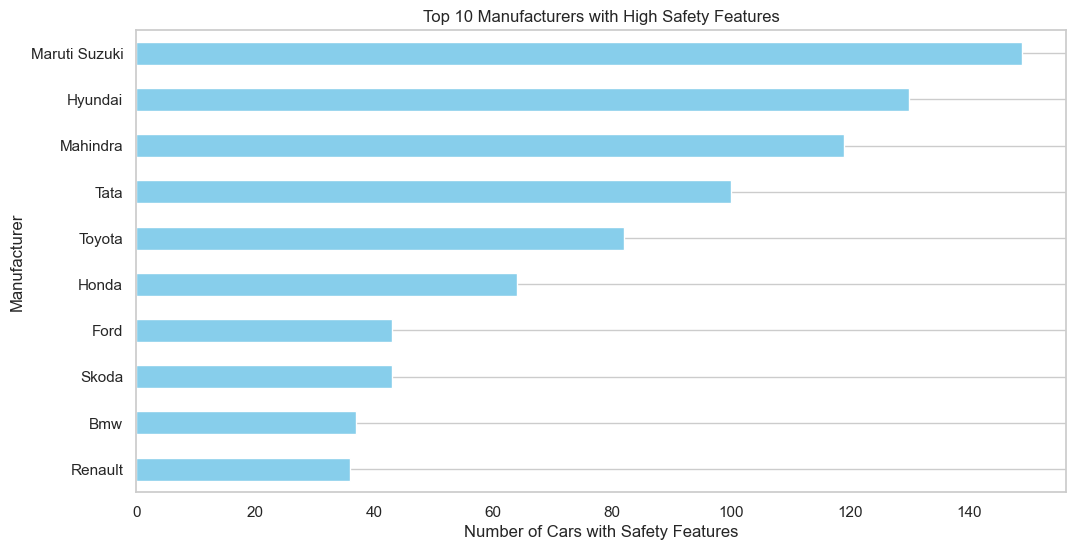

In [12]:
# Selecting cars with safety features
safety_features = [
    'Child_Safety_Locks',
    'Hill_Assist',
    'High_Speed_Alert_System',
    # Add other safety features as needed
]

# Filtering cars with safety features
safe_cars = car_data[car_data[safety_features].all(axis=1)]

# Grouping by manufacturers and counting the number of cars
manufacturer_safety_counts = safe_cars['Make'].value_counts().head(10)

# Plotting a bar graph
plt.figure(figsize=(12, 6))
manufacturer_safety_counts.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.xlabel('Number of Cars with Safety Features')
plt.ylabel('Manufacturer')
plt.title('Top 10 Manufacturers with High Safety Features')
plt.grid(axis='x')
plt.show()

###### task 9

In [13]:
drive_modes_columns = ['Normal', 'Comfort', 'Eco', 'Sport', 'Power']

# Filter cars with all specified drive modes
def has_all_modes(modes):
    return isinstance(modes, (list, str)) and all(mode in modes for mode in drive_modes_columns)

cars_with_all_modes = car_data[car_data['Drive_Modes'].apply(has_all_modes)]

# Display details of cars with all drive modes
print(cars_with_all_modes)

     S. No.  Make Model                    Variant  Displacement  Cylinders  \
321     321  Audi    Q8  55 Tfsi Quattro Tiptronic        2995.0        4.0   
330     330  Audi  A8 L            55 Tfsi Quattro        2995.0        8.0   

     Valves_Per_Cylinder             Drivetrain Cylinder_Configuration  \
321                  4.0  AWD (All Wheel Drive)                      V   
330                  4.0  AWD (All Wheel Drive)                      V   

         Engine_Location  ... Leather_Wrapped_Steering  Automatic_Headlamps  \
321  Front, Longitudinal  ...                      Yes                  NaN   
330  Front, Longitudinal  ...                      Yes                  NaN   

                                           Engine_Type  \
321  Roller cam follower, continuous intake and exh...   
330                                                NaN   

     ASR_/_Traction_Control  Cruise_Control  USB_Ports Heads-Up_Display  \
321                     Yes             Yes        

###### task 10

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


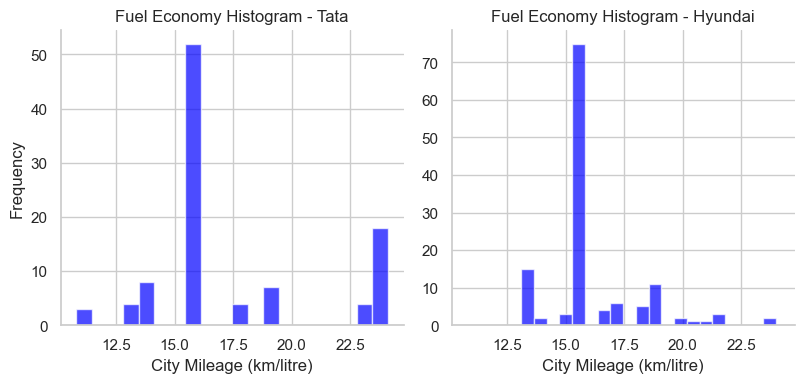

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
# List of manufacturers
selected_manufacturers = ['Hyundai', 'Suzuki', 'Tata', 'BMW']

# Set the style of seaborn
sns.set(style="whitegrid")

# Filter data for selected manufacturers
selected_data = car_data[car_data['Make'].isin(selected_manufacturers)]

# Create a FacetGrid using seaborn
g = sns.FacetGrid(selected_data, col="Make", col_wrap=2, height=4, sharey=False)

# Map the histograms onto the grid
g.map(plt.hist, 'City_Mileage_km_litre', bins=20, color='blue', alpha=0.7)

# Set titles and labels
g.set_axis_labels('City Mileage (km/litre)', 'Frequency')
g.set_titles('Fuel Economy Histogram - {col_name}')
plt.show()

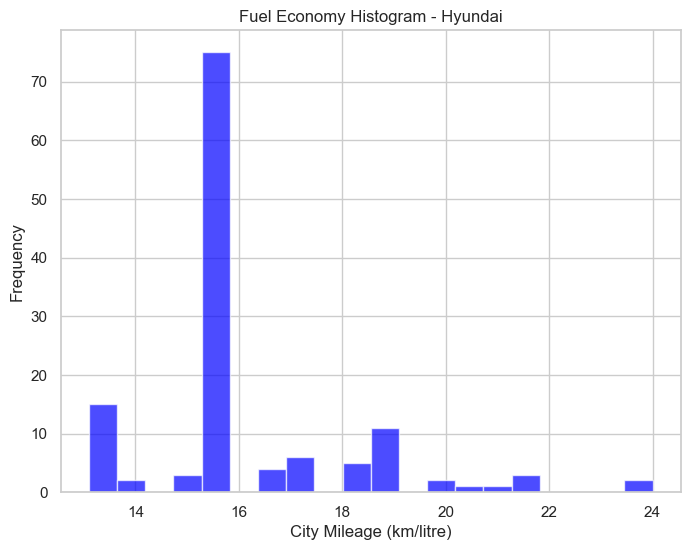

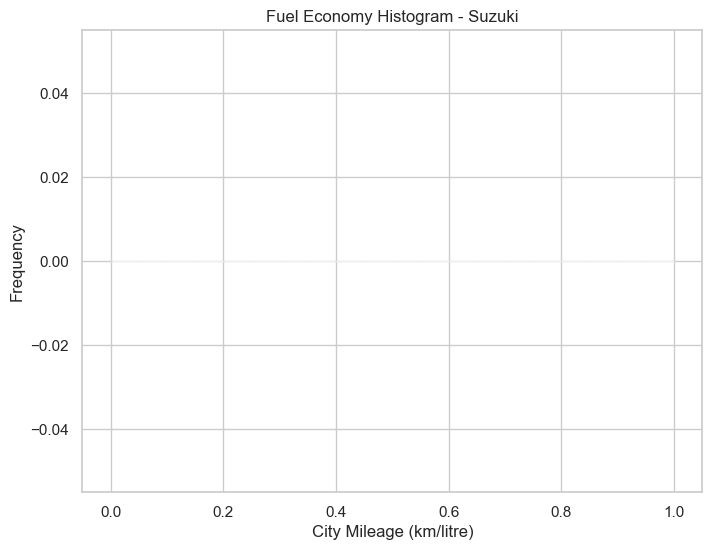

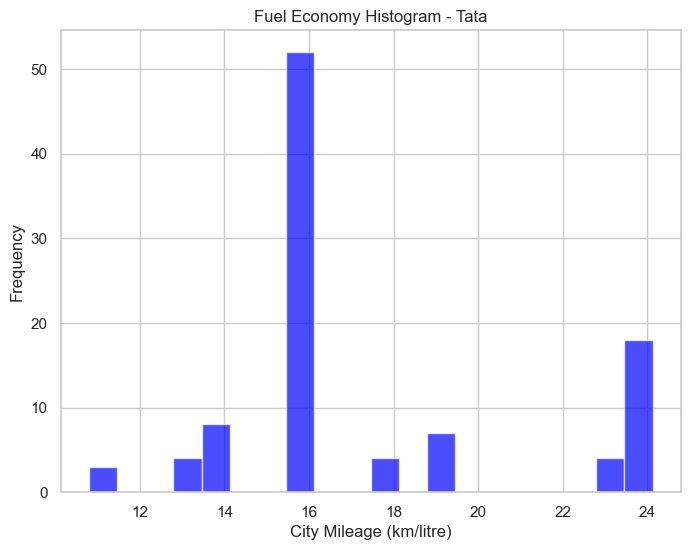

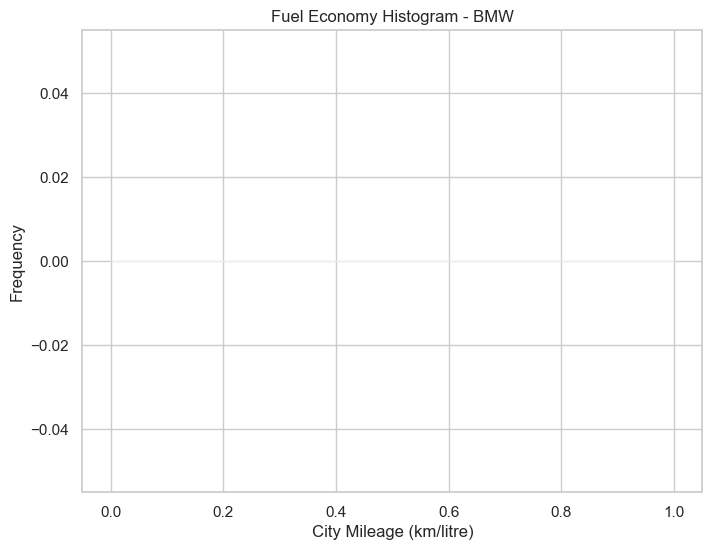

In [16]:
# List of manufacturers
selected_manufacturers = ['Hyundai', 'Suzuki', 'Tata', 'BMW']

# Filter data for selected manufacturers
selected_data = car_data[car_data['Make'].isin(selected_manufacturers)]

# Plot separate histograms for each manufacturer
for manufacturer in selected_manufacturers:
    manufacturer_data = selected_data[selected_data['Make'] == manufacturer]
    
    plt.figure(figsize=(8, 6))
    plt.hist(manufacturer_data['City_Mileage_km_litre'].dropna(), bins=20, color='blue', alpha=0.7)
    
    plt.title(f'Fuel Economy Histogram - {manufacturer}')
    plt.xlabel('City Mileage (km/litre)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()